# Imports + input image

In [2]:
%matplotlib inline

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.util import random_noise, img_as_ubyte



In [8]:
gray = cv.imread('images/Einstein.jpg')   # use sua imagem
gray= cv.cvtColor(gray,cv.COLOR_BGR2GRAY) # converta para gray se for RGB

In [9]:
gray_noisy =  img_as_ubyte(random_noise(gray)) #adds a gaussian random noise to image


/home/larissa/anaconda3/envs/vision/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


# Gaussian blur

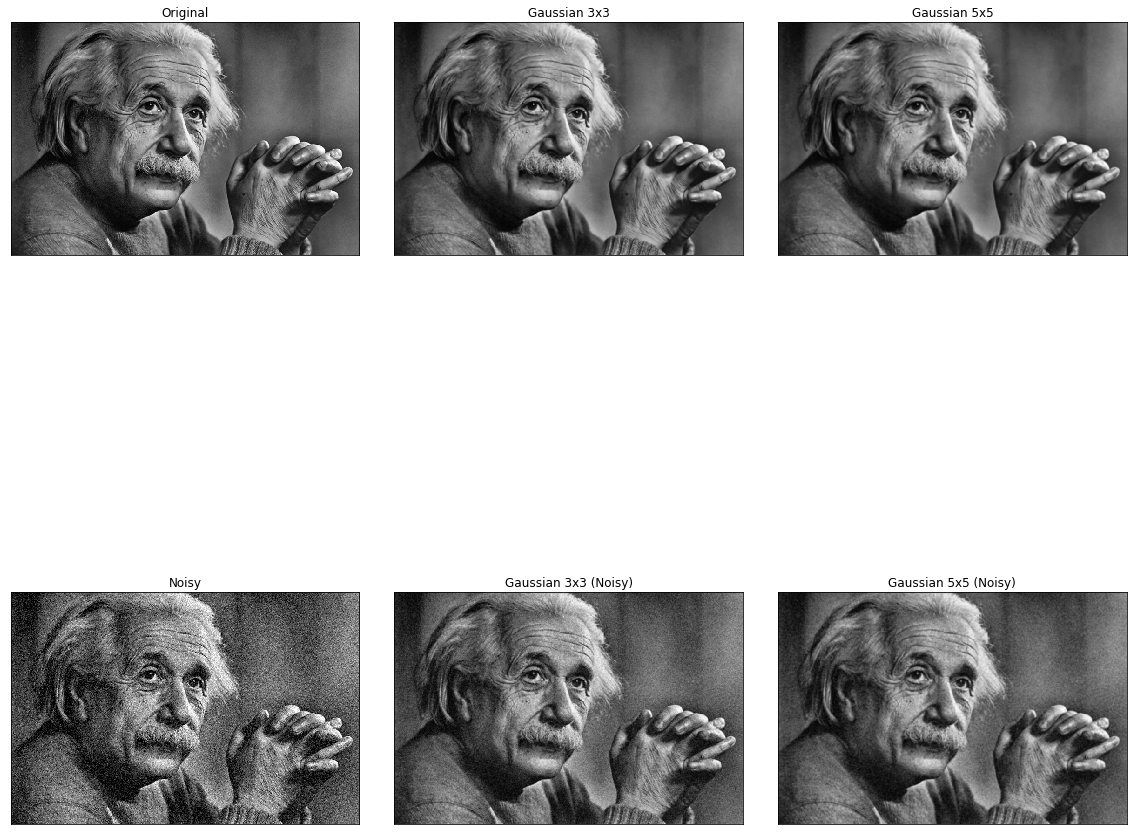

In [29]:
def Gaussiana(img, k):
    blur = cv.GaussianBlur(img,(k,k),0)
    return blur

k = 3
k_2 = 5

fig = plt.figure(figsize = (20,20))
f1 = fig.add_subplot(231)
f1.imshow(gray,cmap="gray",vmin=0,vmax=255)
f1.set_title('Original')
plt.xticks([]),plt.yticks([])

f2 = fig.add_subplot(232)
f2.imshow(Gaussiana(gray, k),cmap="gray",vmin=0,vmax=255)
f2.set_title('Gaussian %dx%d' %(k,k))
plt.xticks([]),plt.yticks([])

f3 = fig.add_subplot(233)
f3.imshow(Gaussiana(gray, k_2),cmap="gray",vmin=0,vmax=255)
f3.set_title('Gaussian %dx%d' %(k_2,k_2))
plt.xticks([]),plt.yticks([])

f4 = fig.add_subplot(234)
f4.imshow(gray_noisy,cmap="gray",vmin=0,vmax=255)
f4.set_title('Noisy')
plt.xticks([]),plt.yticks([])

f5 = fig.add_subplot(235)
f5.imshow(Gaussiana(gray_noisy, k),cmap="gray",vmin=0,vmax=255)
f5.set_title('Gaussian %dx%d (Noisy)' %(k,k))
plt.xticks([]),plt.yticks([])

f6 = fig.add_subplot(236)
f6.imshow(Gaussiana(gray_noisy, k_2),cmap="gray",vmin=0,vmax=255)
f6.set_title('Gaussian %dx%d (Noisy)' %(k_2,k_2))
plt.xticks([]),plt.yticks([])

plt.subplots_adjust(hspace=0.1, wspace = 0.1)


plt.show()

**Análise:** É possível perceber que a primeira imagem (a original) é suavizada pela aplicação do filtro Gaussiano.
Na imagem ruidosa também, sendo esta uma operação que consegue diminuir os efeitos do ruído aditivo na imagem.
Além disso, pode-se comprovar que quanto maior o kernel Gaussiano, mais suavizada é a imagem final em amvos os casos.

# Laplaciana

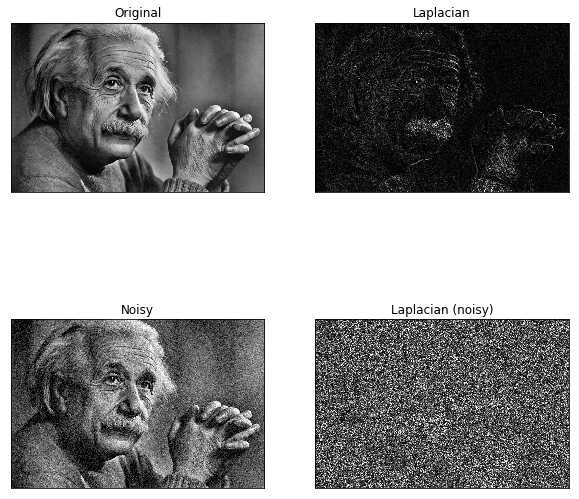

In [31]:
def Laplaciana(img):
    ddepth = cv.CV_16S # ddepth: Depth of the destination image. Since our input is CV_8U we define ddepth = CV_16S to avoid overflow
    lapla = cv.Laplacian(img, ddepth)
    abs_lapla = cv.convertScaleAbs(lapla)
    return abs_lapla

fig = plt.figure(figsize = (10,10))
f1 = fig.add_subplot(221)
f1.imshow(gray,cmap="gray",vmin=0,vmax=255)
f1.set_title('Original')
plt.xticks([]),plt.yticks([])

f2 = fig.add_subplot(222)
f2.imshow(Laplaciana(gray),cmap="gray",vmin=0,vmax=255)
f2.set_title('Laplacian')
plt.xticks([]),plt.yticks([])

f3 = fig.add_subplot(223)
f3.imshow(gray_noisy,cmap="gray",vmin=0,vmax=255)
f3.set_title('Noisy')
plt.xticks([]),plt.yticks([])

f4 = fig.add_subplot(224)
f4.imshow(Laplaciana(gray_noisy),cmap="gray",vmin=0,vmax=255)
f4.set_title('Laplacian (noisy)')
plt.xticks([]),plt.yticks([])

plt.show()


**Análise:** A computação do filtro laplaciano da imagem ruidosa é também bastante ruidosa, pois a imagem (gray_noisy) apresenta bastante variações locais, responsáveis por indicar diversos pontos de borda e causando esta aparência a imagem final. Já para a imagem original, ele mostra algumas bordas desta.

# Laplacian on original x Laplacian on Gaussian

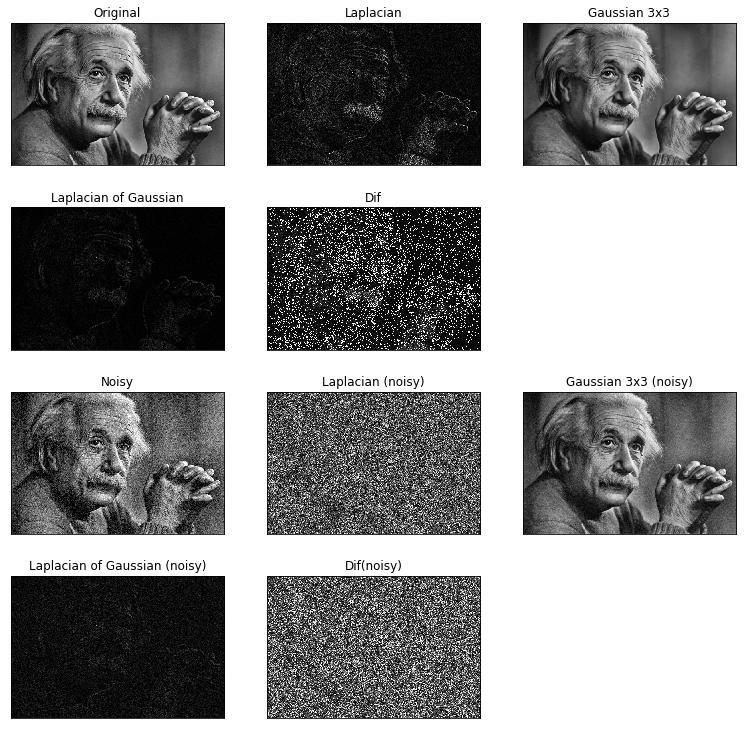

False
False


In [39]:

k = 3

fig = plt.figure(figsize = (13,13))
f1 = fig.add_subplot(431)
f1.imshow(gray,cmap="gray",vmin=0,vmax=255)
f1.set_title('Original')
plt.xticks([]),plt.yticks([])

lap = Laplaciana(gray)
f2 = fig.add_subplot(432)
f2.imshow(lap,cmap="gray",vmin=0,vmax=255)
f2.set_title('Laplacian')
plt.xticks([]),plt.yticks([])

gau = Gaussiana(gray, k)
f3 = fig.add_subplot(433)
f3.imshow(gau,cmap="gray",vmin=0,vmax=255)
f3.set_title('Gaussian %dx%d' %(k,k))
plt.xticks([]),plt.yticks([])

log = Laplaciana(gau)
f4 = fig.add_subplot(434)
f4.imshow(log,cmap="gray",vmin=0,vmax=255)
f4.set_title('Laplacian of Gaussian')
plt.xticks([]),plt.yticks([])

dif = lap - log
f5 = fig.add_subplot(435)
f5.imshow(dif,cmap="gray",vmin=0,vmax=255)
f5.set_title('Dif')
plt.xticks([]),plt.yticks([])

f6 = fig.add_subplot(437)
f6.imshow(gray_noisy,cmap="gray",vmin=0,vmax=255)
f6.set_title('Noisy')
plt.xticks([]),plt.yticks([])

lap_noisy = Laplaciana(gray_noisy)
f7 = fig.add_subplot(438)
f7.imshow(lap_noisy,cmap="gray",vmin=0,vmax=255)
f7.set_title('Laplacian (noisy)')
plt.xticks([]),plt.yticks([])

gau_noisy = Gaussiana(gray_noisy, k)
f8 = fig.add_subplot(439)
f8.imshow(gau_noisy,cmap="gray",vmin=0,vmax=255)
f8.set_title('Gaussian %dx%d (noisy)' %(k,k) )
plt.xticks([]),plt.yticks([])

log_noisy = Laplaciana(gau_noisy)
f9 = fig.add_subplot(4,3,10)
f9.imshow(log_noisy,cmap="gray",vmin=0,vmax=255)
f9.set_title('Laplacian of Gaussian (noisy)')
plt.xticks([]),plt.yticks([])

dif_noisy = lap_noisy - log_noisy
f10 = fig.add_subplot(4,3,11)
f10.imshow(dif_noisy,cmap="gray",vmin=0,vmax=255)
f10.set_title('Dif(noisy)')
plt.xticks([]),plt.yticks([])


plt.show()

def is_similar(image1, image2):
    return image1.shape == image2.shape and not(np.bitwise_xor(image1,image2).any())

print(is_similar(lap,log))
print(is_similar(lap_noisy, log_noisy))


# Log x DoG

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

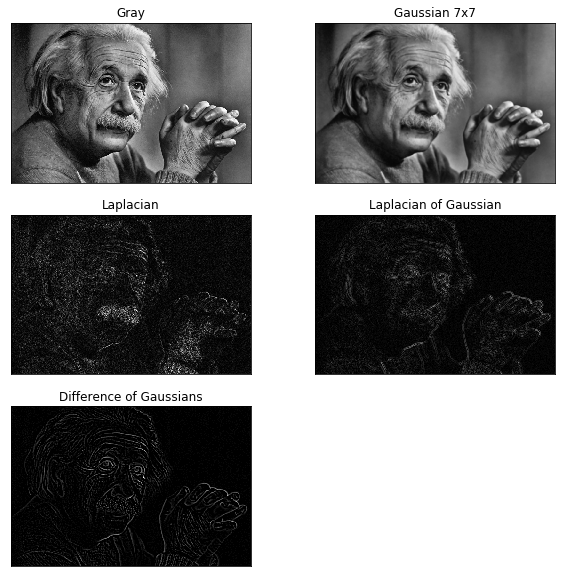

In [40]:
k = 7 # kernel size

# Aplicar Gaussiana
gau1 = cv.GaussianBlur(gray, (k,k), 0)
gau2 = cv.GaussianBlur(gau1, (k,k), 0)

ddepth = cv.CV_16S # ddepth: Depth of the destination image. Since our input is CV_8U we define ddepth = CV_16S to avoid overflow

# Apply Laplace function na gray
lap = cv.Laplacian(gray, ddepth)

# Apply Laplace function na gau1
log = cv.Laplacian(gau1, ddepth)

# difference of Gaussians
dog = cv.subtract(gau2,gau1)

# Visualization
abs_lap = cv.convertScaleAbs(lap)
abs_log = cv.convertScaleAbs(log)
abs_dog = cv.convertScaleAbs(dog)

fig2 = plt.figure(figsize = (10,10))
f1 = fig2.add_subplot(321)
f1.imshow(gray,cmap="gray",vmin=0,vmax=255)
f1.set_title('Gray')
plt.xticks([]),plt.yticks([])

f2 = fig2.add_subplot(322)
f2.imshow(gau1,cmap="gray",vmin=0,vmax=255)
f2.set_title('Gaussian %dx%d' %(k,k))
plt.xticks([]),plt.yticks([])

f3 = fig2.add_subplot(323)
f3.imshow(abs_lap,cmap="gray") #,vmin=0,vmax=255)
f3.set_title('Laplacian')
plt.xticks([]),plt.yticks([])

f4 = fig2.add_subplot(324)
f4.imshow(abs_log,cmap="gray") #,vmin=0,vmax=255)
f4.set_title('Laplacian of Gaussian')
plt.xticks([]),plt.yticks([])

f5 = fig2.add_subplot(325)
f5.imshow(abs_dog, cmap="gray") #,vmin=0,vmax=255)
f5.set_title('Difference of Gaussians')
plt.xticks([]),plt.yticks([])


# Pirâmide (downsampling puro x com gaussiana)

False


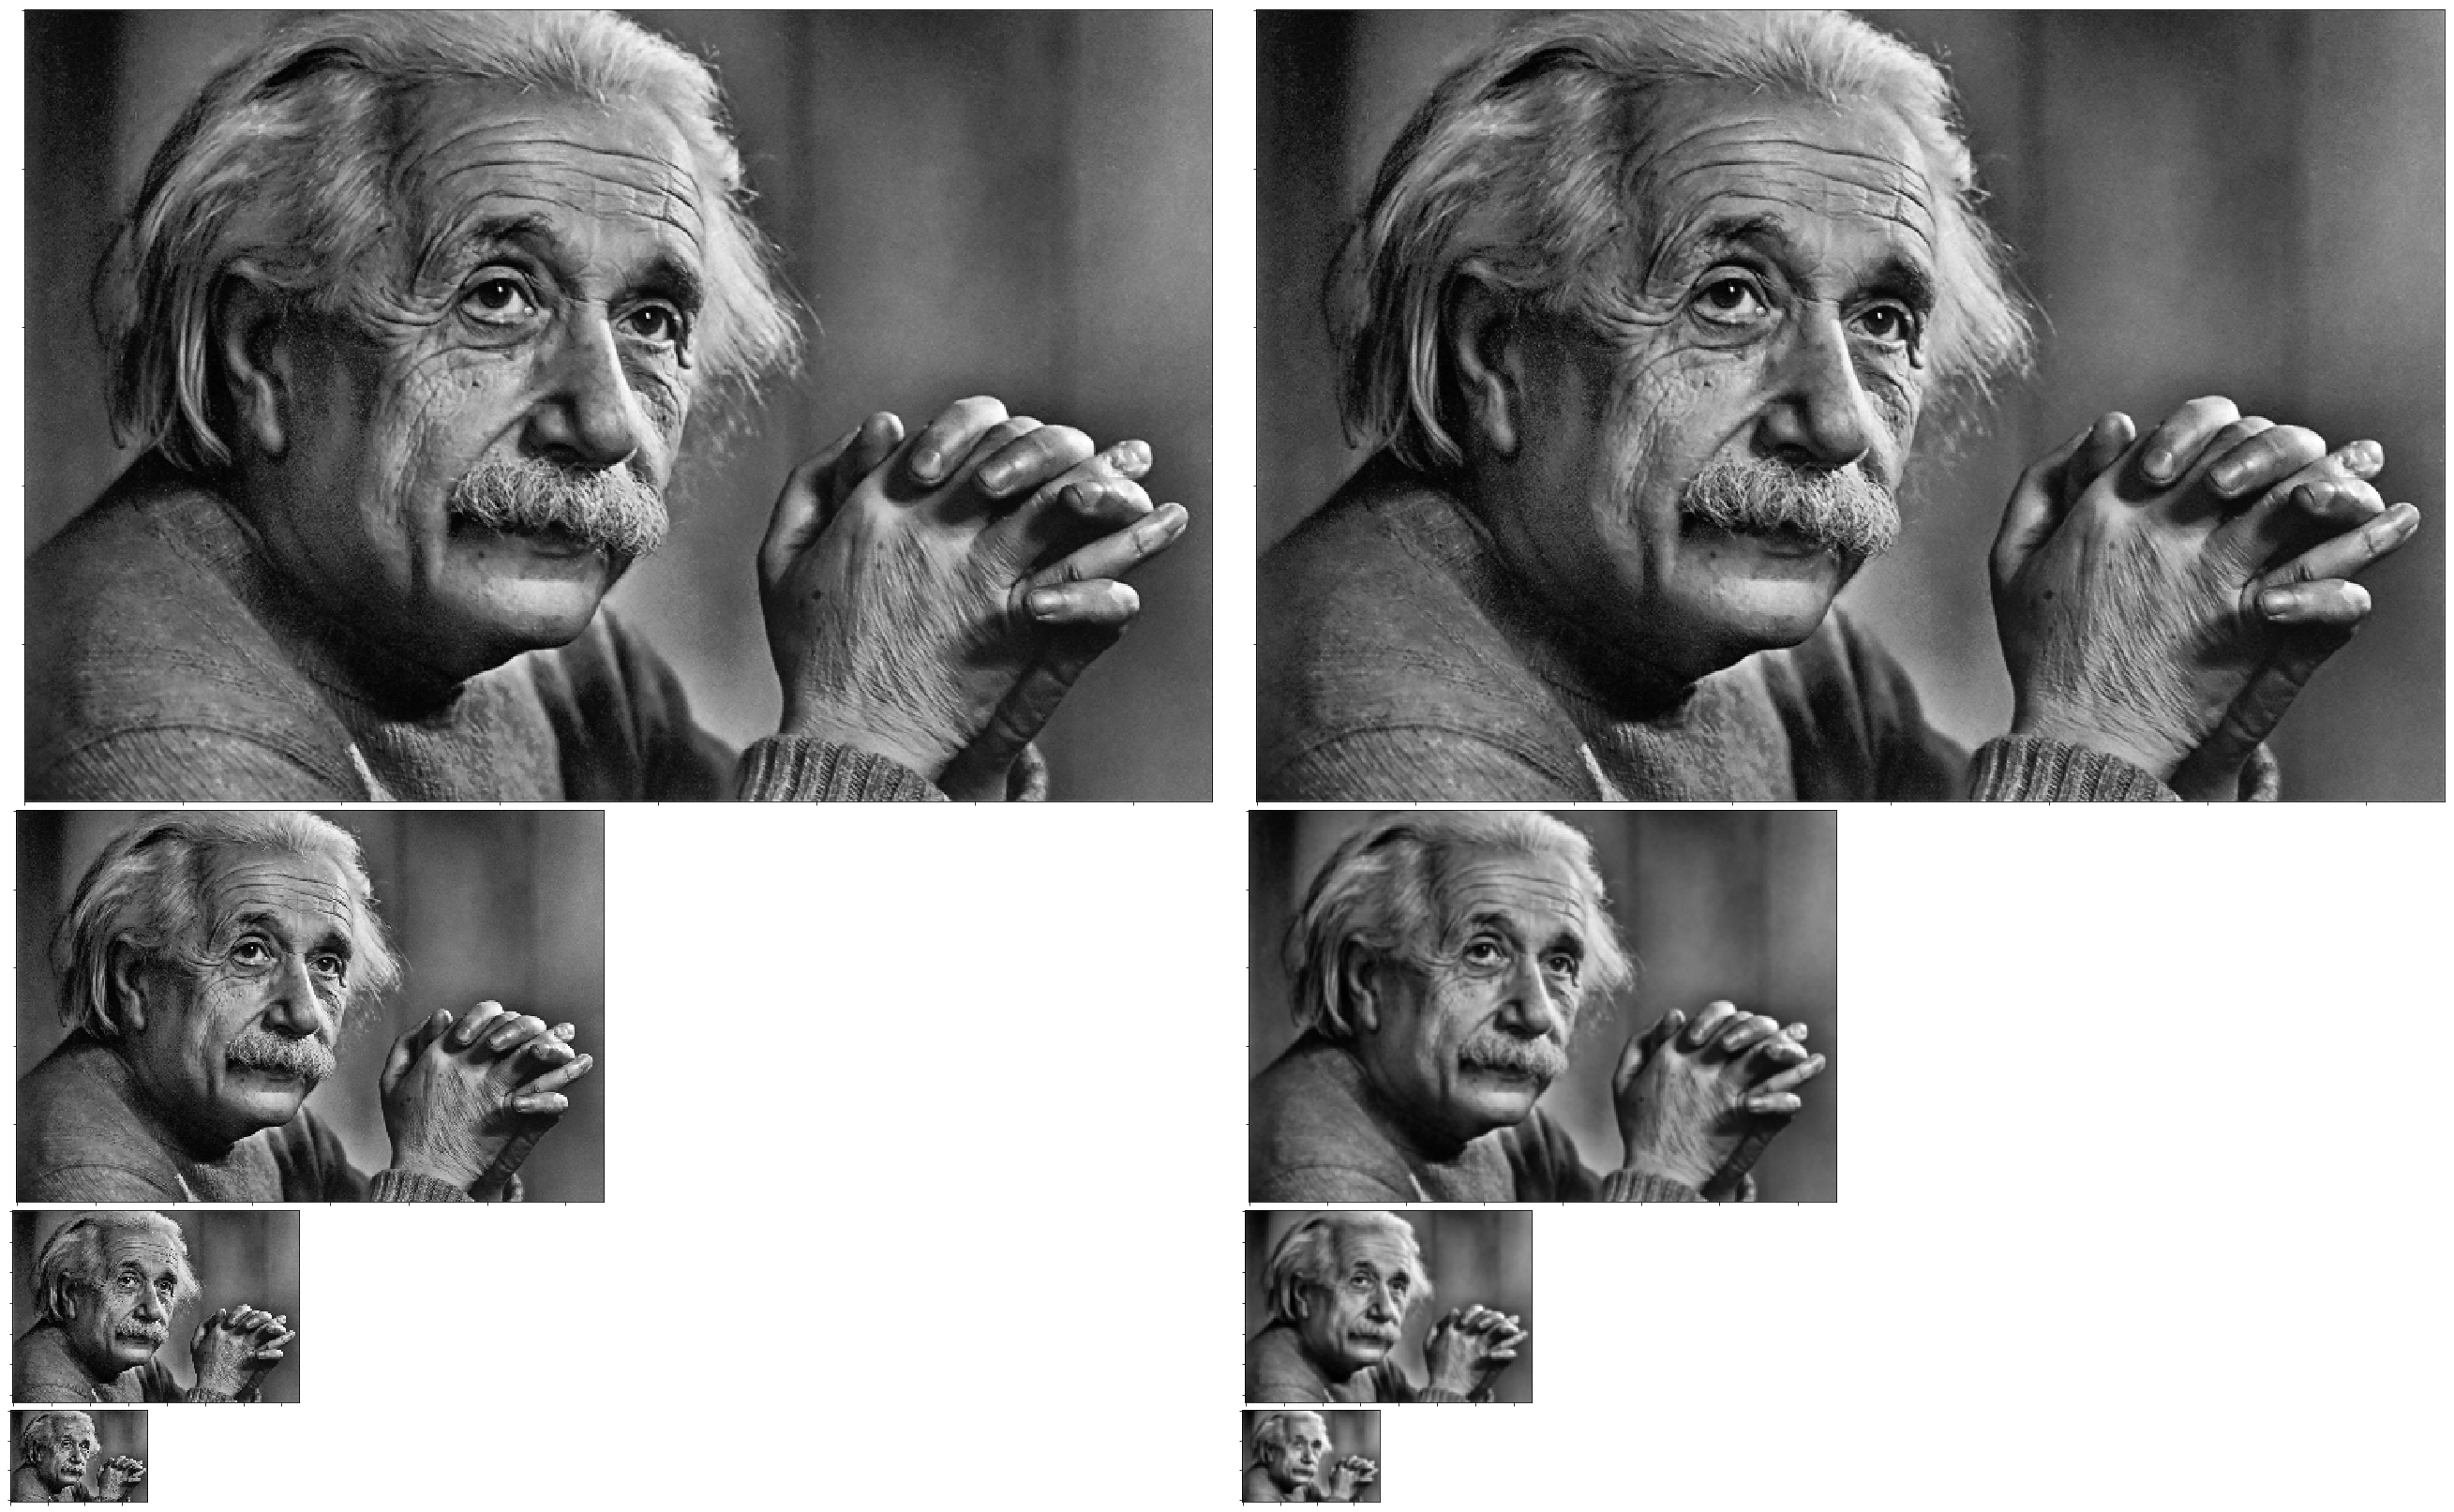

In [41]:
from matplotlib.gridspec import GridSpec

width = int(gray.shape[1] * 50 / 100) 
height = int(gray.shape[0] * 50 / 100) 
dim1 = (width, height)
gray1 = cv.resize(gray, dim1,interpolation=cv.INTER_NEAREST)
width = int(gray1.shape[1] * 50 / 100) 
height = int(gray1.shape[0] * 50 / 100) 
dim2 = (width, height)
gray2 = cv.resize(gray1, dim2,interpolation=cv.INTER_NEAREST)
width = int(gray2.shape[1] * 50 / 100) 
height = int(gray2.shape[0] * 50 / 100) 
dim3 = (width, height)
gray3 = cv.resize(gray2, dim3,interpolation=cv.INTER_NEAREST)

gau0 = Gaussiana(gray,k)
ggray1 = cv.resize(gau0, dim1,interpolation=cv.INTER_NEAREST)
gau1 = Gaussiana(ggray1,k)
ggray2 = cv.resize(gau1, dim2,interpolation=cv.INTER_NEAREST)
gau2 = Gaussiana(ggray2,k)
ggray3 = cv.resize(gau2, dim3,interpolation=cv.INTER_NEAREST)

print(is_similar(gray1,ggray1))

dpi = 80
#height, width, depth = img.shape
height, width = gray.shape
figsize = 5*(width / float(dpi)), 5*(height / float(dpi))
fig = plt.figure(figsize=figsize)
#fig = plt.figure(figsize=(20,20))
gs = GridSpec(32, 32)

ax0 = plt.subplot(gs[0:16,0:16])
ax0.imshow(gray, cmap='gray')
ax0.tick_params(labelbottom=False, labelleft=False)
ax1 = plt.subplot(gs[0:16,16:])
ax1.imshow(gray, cmap='gray')
ax1.tick_params(labelbottom=False, labelleft=False)

ax2 = plt.subplot(gs[16:24,0:8])
ax2.imshow(gray1, cmap='gray')
ax2.tick_params(labelbottom=False, labelleft=False)
ax3 = plt.subplot(gs[16:24,16:24])
ax3.imshow(ggray1, cmap='gray')
ax3.tick_params(labelbottom=False, labelleft=False)

ax4 = plt.subplot(gs[24:28,0:4])
ax4.imshow(gray2, cmap='gray')
ax4.tick_params(labelbottom=False, labelleft=False)
ax5 = plt.subplot(gs[24:28,16:20])
ax5.imshow(ggray2, cmap='gray')
ax5.tick_params(labelbottom=False, labelleft=False)

ax6 = plt.subplot(gs[28:30,0:2])
ax6.imshow(gray3, cmap='gray')
ax6.tick_params(labelbottom=False, labelleft=False)
ax7 = plt.subplot(gs[28:30,16:18])
ax7.imshow(ggray3, cmap='gray')
ax7.tick_params(labelbottom=False, labelleft=False)
plt.show()